In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math
import warnings

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bone_marrow_transplant_children = fetch_ucirepo(id=565)

# data (as pandas dataframes)
X = bone_marrow_transplant_children.data.features
y = bone_marrow_transplant_children.data.targets

# metadata
print(bone_marrow_transplant_children.metadata)

# variable information
print(bone_marrow_transplant_children.variables)


# Recipientageint,HLAgrI,Allele,Antigen,HLAmatch, Disease,CMVstatus,RecipientABO,DonorABO

{'uci_id': 565, 'name': 'Bone marrow transplant: children', 'repository_url': 'https://archive.ics.uci.edu/dataset/565/bone+marrow+transplant+children', 'data_url': 'https://archive.ics.uci.edu/static/public/565/data.csv', 'abstract': 'The data set describes pediatric patients with several hematologic diseases, who were subject to the unmanipulated allogeneic unrelated donor hematopoietic stem cell transplantation.', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 187, 'num_features': 36, 'feature_types': ['Integer', 'Real'], 'demographics': ['Gender', 'Age'], 'target_col': ['survival_status'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2020, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5NP6Z', 'creators': ['Marek Sikora', 'Łukasz Wróbel', 'Adam Gudyś'], 'intro_paper': {'title': 'GuideR: a guided separate-and-conquer rule learn

In [ ]:
X['y']=y

In [ ]:
X

,Recipientgender,Stemcellsource,Donorage,Donorage35,IIIV,Gendermatch,DonorABO,RecipientABO,RecipientRh,ABOmatch,...,extcGvHD,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_time,y
0,1,1,22.830137,0,1,0,1,1.0,1.0,0.0,...,1.0,7.20,1.338760,5.38,35.0,19,51,32,999,0
1,1,0,23.342466,0,1,0,-1,-1.0,1.0,0.0,...,1.0,4.50,11.078295,0.41,20.6,16,37,1000000,163,1
2,1,0,26.394521,0,1,0,-1,-1.0,1.0,0.0,...,1.0,7.94,19.013230,0.42,23.4,23,20,1000000,435,1
3,0,0,39.684932,1,1,0,1,2.0,1.0,1.0,...,NaN,4.25,29.481647,0.14,50.0,23,29,19,53,1
4,0,1,33.358904,0,0,0,1,2.0,0.0,1.0,...,1.0,51.85,3.972255,13.05,9.0,14,14,1000000,2043,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,1,1,37.575342,1,1,0,1,1.0,0.0,0.0,...,1.0,11.08,2.522750,4.39,44.0,15,22,16,385,1
183,0,1,22.895890,0,0,0,1,0.0,1.0,1.0,...,1.0,4.64,1.038858,4.47,44.5,12,30,1000000,634,1
184,0,1,27.347945,0,1,0,1,-1.0,1.0,1.0,...,1.0,7.73,1.635559,4.73,33.0,16,16,1000000,1895,0
185,1,1,27.780822,0,1,0,1,0.0,1.0,1.0,...,0.0,15.41,8.077770,1.91,24.0,13,14,54,382,1


In [ ]:
COL=X.columns

In [ ]:
print(X.isnull().sum())

Recipientgender          0
Stemcellsource           0
Donorage                 0
Donorage35               0
IIIV                     0
Gendermatch              0
DonorABO                 0
RecipientABO             1
RecipientRh              2
ABOmatch                 1
CMVstatus               16
DonorCMV                 2
RecipientCMV            14
Disease                  0
Riskgroup                0
Txpostrelapse            0
Diseasegroup             0
HLAmatch                 0
HLAmismatch              0
Antigen                  1
Allele                   1
HLAgrI                   0
Recipientage             0
Recipientage10           0
Recipientageint          0
Relapse                  0
aGvHDIIIIV               0
extcGvHD                31
CD34kgx10d6              0
CD3dCD34                 5
CD3dkgx10d8              5
Rbodymass                2
ANCrecovery              0
PLTrecovery              0
time_to_aGvHD_III_IV     0
survival_time            0
y                        0
d

In [ ]:
for i in X.columns:
  print(f"column name:  {i}")
  print(X[i].unique())

column name:  Recipientgender
[1 0]
column name:  Stemcellsource
[1 0]
column name:  Donorage
[22.830137 23.342466 26.394521 39.684932 33.358904 27.391781 34.520548
 21.435616 32.641096 28.783562 29.731507 36.8      40.863014 30.60274
 30.676712 41.164384 40.232877 40.821918 43.375342 31.745205 43.578082
 42.380822 31.545205 24.780822 30.50411  20.605479 40.969863 39.983562
 33.052055 39.172603 24.731507 24.353425 39.024658 23.446575 39.380822
 20.961644 49.860274 43.517808 40.536986 21.4      34.273973 20.471233
 44.380822 20.358904 31.526027 38.761644 28.805479 36.868493 29.772603
 28.821918 30.287671 33.120548 39.641096 39.632877 34.169863 31.194521
 30.389041 24.367123 37.287671 30.2      35.087671 29.161644 44.413699
 55.40274  43.715068 45.915068 22.643836 47.112329 26.221918 24.476712
 35.287671 31.671233 26.731507 39.643836 41.542466 42.268493 41.443836
 29.964384 21.263014 21.756164 29.980822 22.112329 37.       33.550685
 35.630137 40.052055 33.791781 32.372603 25.210959 28.2

In [ ]:
print(X.isnull().sum())

Recipientgender          0
Stemcellsource           0
Donorage                 0
Donorage35               0
IIIV                     0
Gendermatch              0
DonorABO                 0
RecipientABO             1
RecipientRh              2
ABOmatch                 1
CMVstatus               16
DonorCMV                 2
RecipientCMV            14
Disease                  0
Riskgroup                0
Txpostrelapse            0
Diseasegroup             0
HLAmatch                 0
HLAmismatch              0
Antigen                  1
Allele                   1
HLAgrI                   0
Recipientage             0
Recipientage10           0
Recipientageint          0
Relapse                  0
aGvHDIIIIV               0
extcGvHD                31
CD34kgx10d6              0
CD3dCD34                 5
CD3dkgx10d8              5
Rbodymass                2
ANCrecovery              0
PLTrecovery              0
time_to_aGvHD_III_IV     0
survival_time            0
y                        0
d

In [ ]:
numerical_columns={

                   "mean":  ['Donorage','CD34kgx10d6',
                          'CD3dCD34','Rbodymass','ANCrecovery',
                          'ANCrecovery','PLTrecovery','time_to_aGvHD_III_IV','survival_time'],
                    "median": ['CMVstatus'
                          ,'DonorCMV','RecipientCMV','extcGvHD',
                          'Allele','RecipientRh','Antigen','CD3dkgx10d8',
                           'Antigen','ABOmatch','RecipientABO']
}
pie_columns=['Recipientage10','Recipientageint','Relapse','aGvHDIIIIV','extcGvHD']
CATAGORICAL_DATA=['Disease']




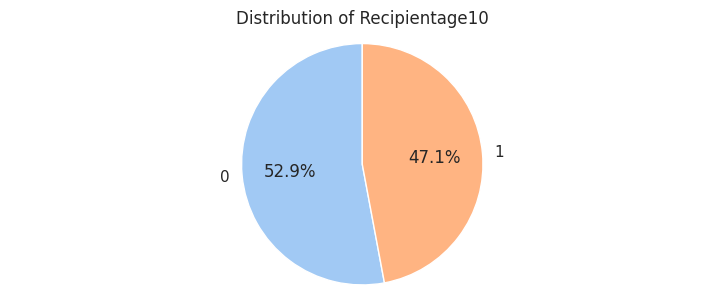

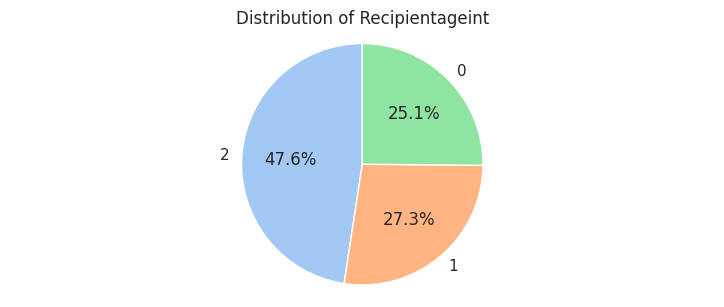

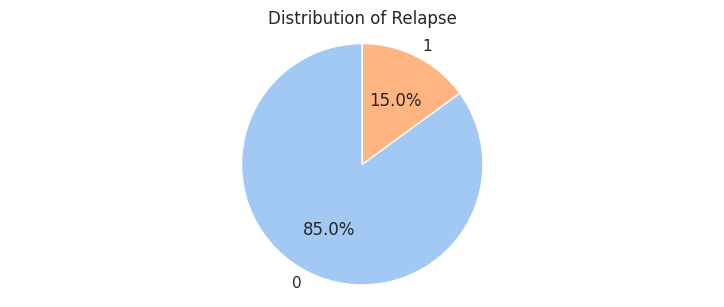

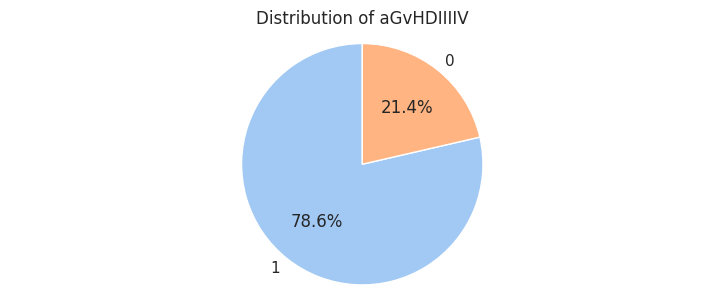

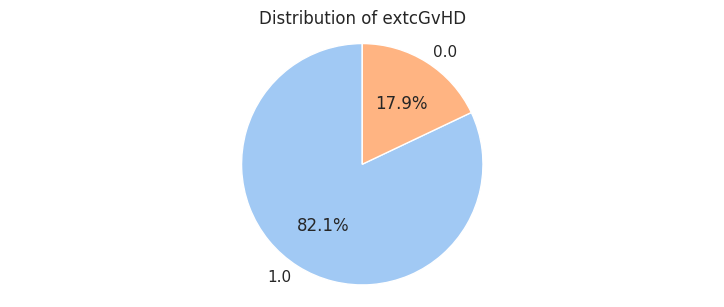

In [ ]:

sns.set(style="whitegrid")
for i,cat in enumerate(pie_columns):
  plt.figure(figsize=(20,20))
  plt.subplot(len(pie_columns),2,i+1)
  categories=X[cat].unique
  category_counts = X[cat].value_counts(normalize=True) * 100
  plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
  # centre_circle = plt.Circle((0,0),0.70,fc='white')
  fig = plt.gcf()
  # fig.gca().add_artist(centre_circle)
  plt.title(f"Distribution of {cat}")
  plt.axis('equal')
  plt.show()

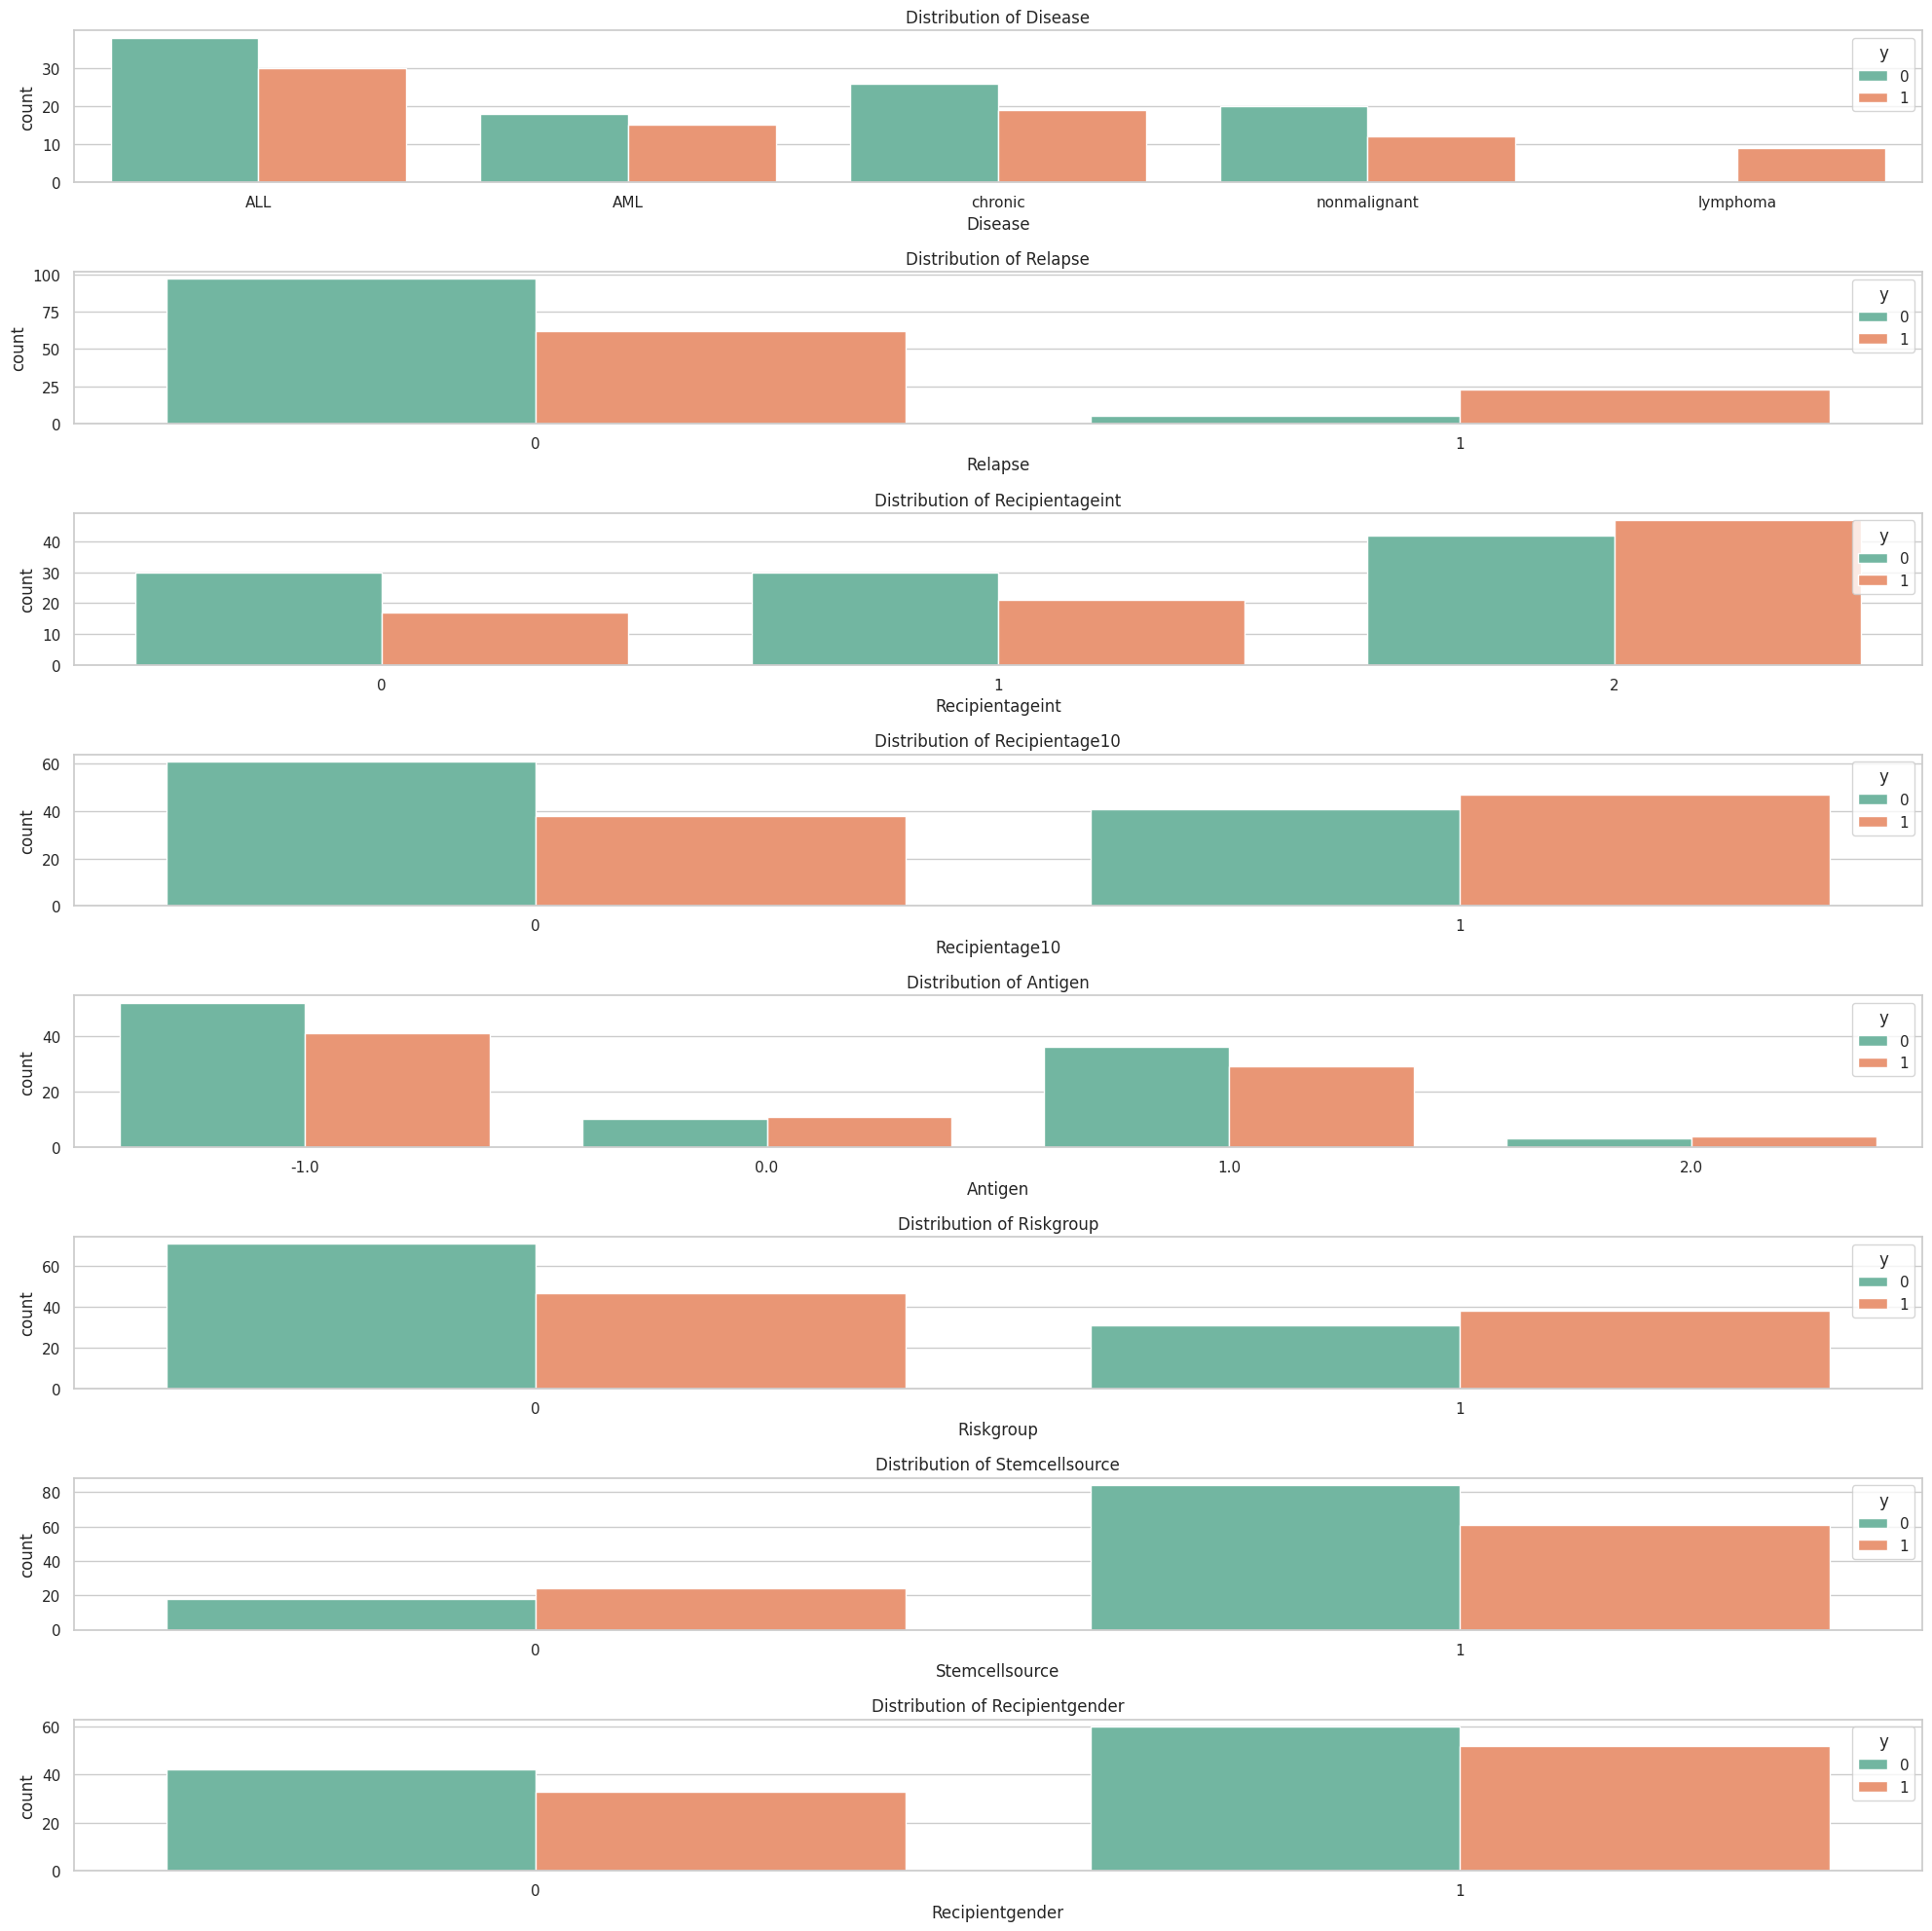

In [ ]:
columns=['Disease',"Relapse","Recipientageint",'Recipientage10','Antigen','Riskgroup','Stemcellsource','Recipientgender']

df_cat =columns
sns.set(style="whitegrid")
plt.figure(figsize=(20,20))
for i,cat in enumerate(df_cat):
    plt.subplot(len(df_cat),1,i+1)
    sns.countplot(x=cat,hue="y",data=X,palette="Set2")
    plt.title(f"Distribution of {cat}")
plt.tight_layout()
plt.show()


##PREPROCESS

In [ ]:
remove_columns=['Donorage35','aGvHDIIIIV','Recipientage10']
X=X.drop(columns=remove_columns)

In [ ]:
COL

Index(['Recipientgender', 'Stemcellsource', 'Donorage', 'Donorage35', 'IIIV',
       'Gendermatch', 'DonorABO', 'RecipientABO', 'RecipientRh', 'ABOmatch',
       'CMVstatus', 'DonorCMV', 'RecipientCMV', 'Disease', 'Riskgroup',
       'Txpostrelapse', 'Diseasegroup', 'HLAmatch', 'HLAmismatch', 'Antigen',
       'Allele', 'HLAgrI', 'Recipientage', 'Recipientage10', 'Recipientageint',
       'Relapse', 'aGvHDIIIIV', 'extcGvHD', 'CD34kgx10d6', 'CD3dCD34',
       'CD3dkgx10d8', 'Rbodymass', 'ANCrecovery', 'PLTrecovery',
       'time_to_aGvHD_III_IV', 'survival_time', 'y'],
      dtype='object')

In [ ]:
for i in numerical_columns['mean']:
  X[i]=X[i].fillna(X[i].mean())
for i in numerical_columns['median']:
  X[i]=X[i].fillna(X[i].median())


In [ ]:
print(X.isnull().sum())

Recipientgender         0
Stemcellsource          0
Donorage                0
IIIV                    0
Gendermatch             0
DonorABO                0
RecipientABO            0
RecipientRh             0
ABOmatch                0
CMVstatus               0
DonorCMV                0
RecipientCMV            0
Disease                 0
Riskgroup               0
Txpostrelapse           0
Diseasegroup            0
HLAmatch                0
HLAmismatch             0
Antigen                 0
Allele                  0
HLAgrI                  0
Recipientage            0
Recipientageint         0
Relapse                 0
extcGvHD                0
CD34kgx10d6             0
CD3dCD34                0
CD3dkgx10d8             0
Rbodymass               0
ANCrecovery             0
PLTrecovery             0
time_to_aGvHD_III_IV    0
survival_time           0
y                       0
dtype: int64


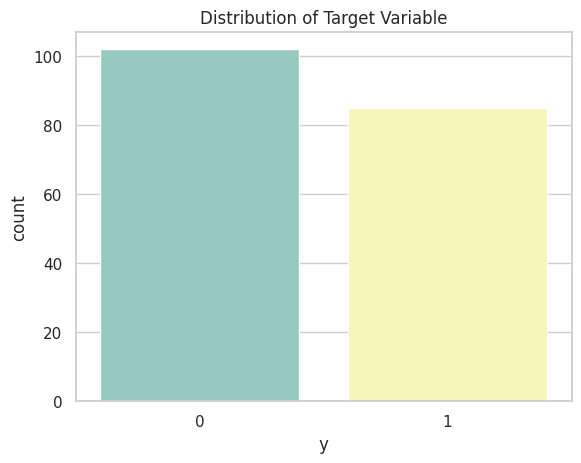

In [ ]:
sns.countplot(x='y',data=X,palette="Set3").set_title("Distribution of Target Variable")
plt.show()

<ipython-input-21-75eeb895e048>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(X.corr(),annot=True,cmap='crest')


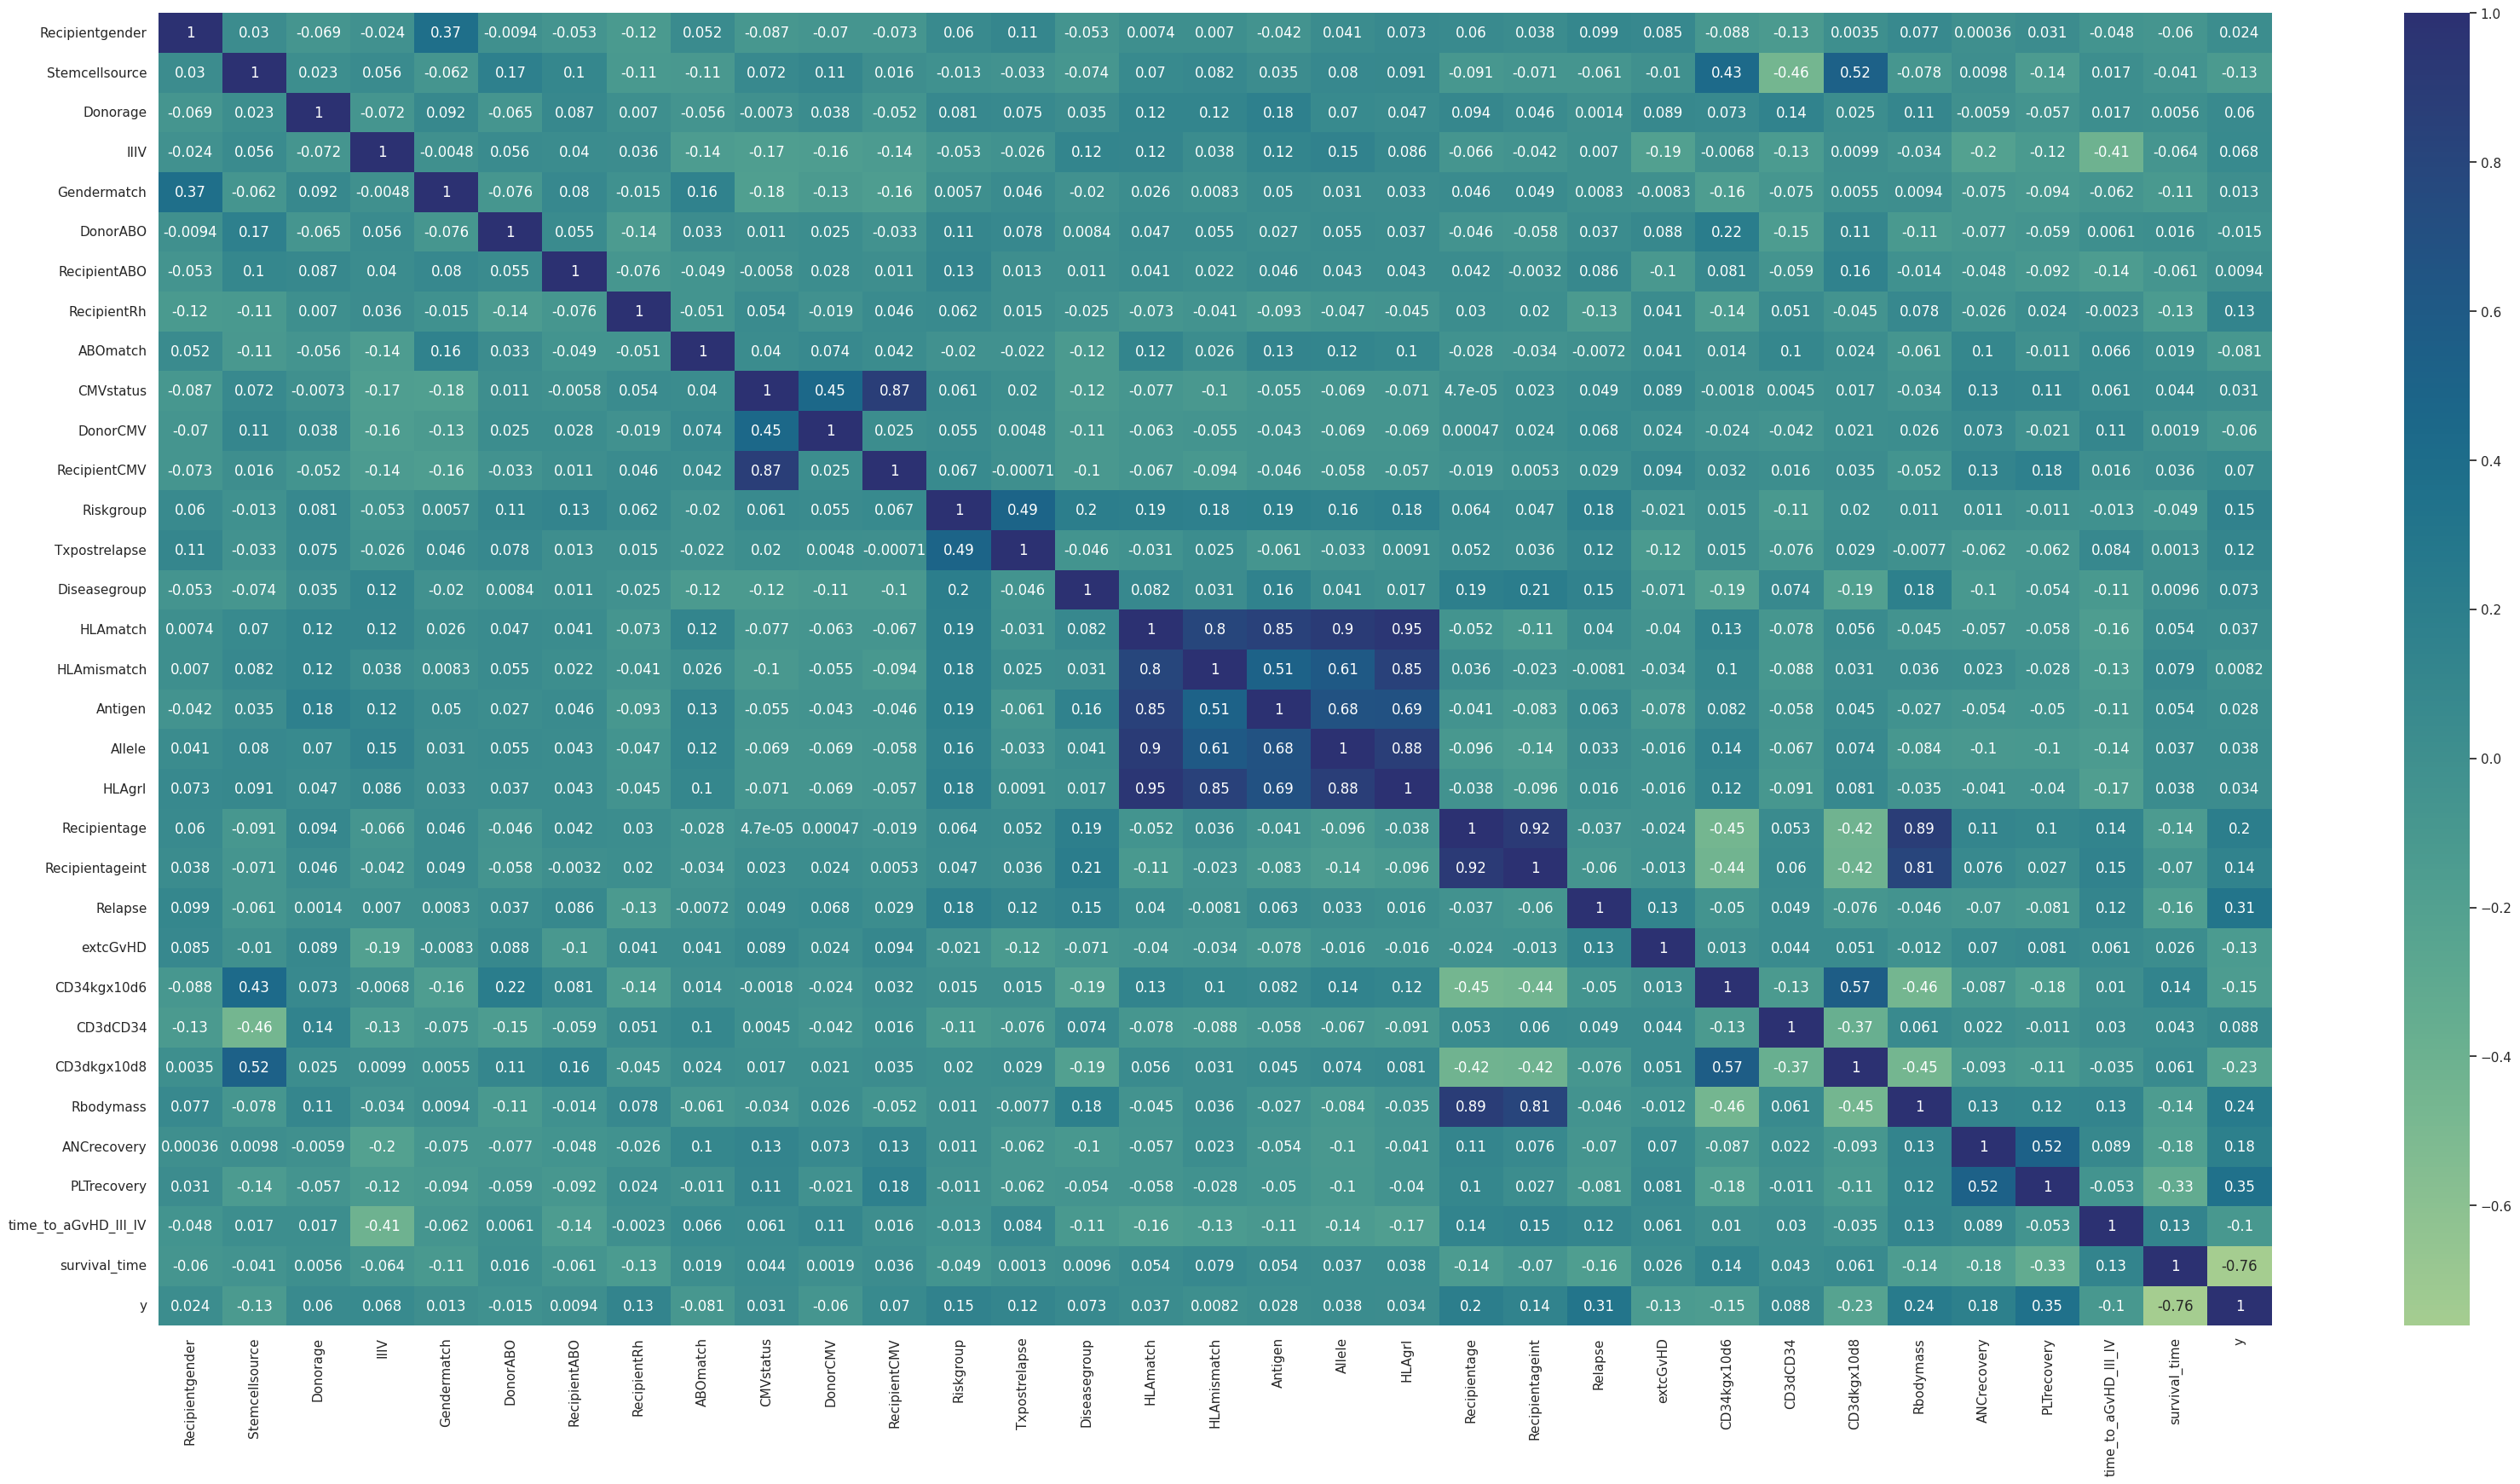

In [ ]:
df_corr=X.select_dtypes(include=['int64','float64'])
plt.figure(figsize=[40,20])
sns.heatmap(X.corr(),annot=True,cmap='crest')
plt.show()

##NUMERICAL ANALYSIS

In [ ]:
X_ohe=pd.get_dummies(X,columns=CATAGORICAL_DATA)


In [ ]:
X_ohe.shape

(187, 38)

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test=train_test_split(X_ohe,test_size=0.2,random_state=42)

In [ ]:
X_train.head(10)

,Recipientgender,Stemcellsource,Donorage,IIIV,Gendermatch,DonorABO,RecipientABO,RecipientRh,ABOmatch,CMVstatus,...,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_time,y,Disease_ALL,Disease_AML,Disease_chronic,Disease_lymphoma,Disease_nonmalignant
95,1,1,21.128767,1,1,0,0.0,1.0,0.0,0.0,...,15,17,1000000,1257,0,1,0,0,0,0
69,1,1,24.476712,1,0,0,1.0,1.0,1.0,2.0,...,14,17,1000000,1728,0,0,1,0,0,0
109,1,1,39.249315,1,0,0,1.0,1.0,1.0,2.0,...,13,12,1000000,28,1,0,0,0,0,1
29,0,1,39.172603,1,0,1,1.0,1.0,0.0,3.0,...,15,23,1000000,576,1,1,0,0,0,0
126,0,0,37.380822,1,0,1,0.0,1.0,1.0,0.0,...,14,15,1000000,2112,0,0,1,0,0,0
45,0,1,38.761644,1,0,0,0.0,1.0,0.0,0.0,...,12,14,1000000,150,1,1,0,0,0,0
125,1,1,36.435616,0,0,0,2.0,0.0,1.0,2.0,...,17,24,1000000,290,1,1,0,0,0,0
31,1,1,24.353425,0,0,1,1.0,1.0,0.0,1.0,...,14,19,1000000,531,0,1,0,0,0,0
12,1,1,40.863014,0,0,0,1.0,1.0,1.0,1.0,...,14,37,1000000,964,0,1,0,0,0,0
41,1,0,20.471233,1,0,1,-1.0,1.0,1.0,0.0,...,17,1000000,1000000,28,1,1,0,0,0,0


In [ ]:
X_train_final=X_train.drop('y',axis=1)
y_train=X_train['y']

X_test_final=X_test.drop('y',axis=1)
y_test=X_test['y']

In [ ]:
y_train

95     0
69     0
109    1
29     1
126    0
      ..
106    1
14     0
92     1
179    0
102    1
Name: y, Length: 149, dtype: int64

In [ ]:

X_test

,Recipientgender,Stemcellsource,Donorage,IIIV,Gendermatch,DonorABO,RecipientABO,RecipientRh,ABOmatch,CMVstatus,...,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_time,y,Disease_ALL,Disease_AML,Disease_chronic,Disease_lymphoma,Disease_nonmalignant
185,1,1,27.780822,1,0,1,0.0,1.0,1.0,0.0,...,13,14,54,382,1,0,0,1,0,0
78,1,0,21.263014,0,0,-1,0.0,1.0,1.0,2.0,...,21,170,1000000,1397,0,1,0,0,0,0
55,1,1,31.194521,0,0,2,0.0,1.0,1.0,3.0,...,13,10,1000000,1958,0,0,0,0,0,1
137,1,1,46.002740,0,0,-1,0.0,1.0,1.0,2.0,...,1000000,1000000,1000000,15,1,0,0,0,1,0
161,1,1,30.421918,1,1,0,2.0,0.0,1.0,2.0,...,14,33,18,1074,0,1,0,0,0,0
15,1,0,41.164384,0,0,0,-1.0,1.0,1.0,3.0,...,17,19,1000000,3288,0,0,0,1,0,0
75,1,0,42.268493,1,1,0,1.0,1.0,1.0,2.0,...,16,47,1000000,435,1,0,1,0,0,0
154,0,0,25.506849,1,0,-1,-1.0,1.0,0.0,2.0,...,18,37,1000000,246,1,1,0,0,0,0
122,0,0,24.284932,1,0,0,-1.0,1.0,1.0,0.0,...,17,21,100,2153,0,0,0,1,0,0
175,0,1,36.690411,1,0,1,-1.0,1.0,1.0,2.0,...,15,247,1000000,2373,0,1,0,0,0,0


#                           VARIOUS CLASSIFIERS and their Accuracy

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression()
log_reg.fit(X_train_final, y_train)

y_pred_log_reg = log_reg.predict(X_test_final)

print("Accuracy: %.3f" %accuracy_score(y_test, y_pred_log_reg))

Accuracy: 0.947


<Axes: >

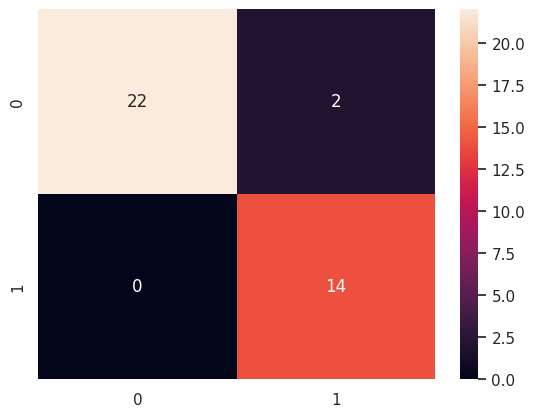

In [ ]:

from sklearn.metrics import confusion_matrix
cfm_rfc=confusion_matrix(y_pred_log_reg,y_test)
sns.heatmap(cfm_rfc,annot=True)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(X_train_final, y_train)
y_pred_knn=neigh.predict(X_test_final)

print("Accuracy: %.3f" %accuracy_score(y_test,  y_pred_knn))

Accuracy: 0.947


<Axes: >

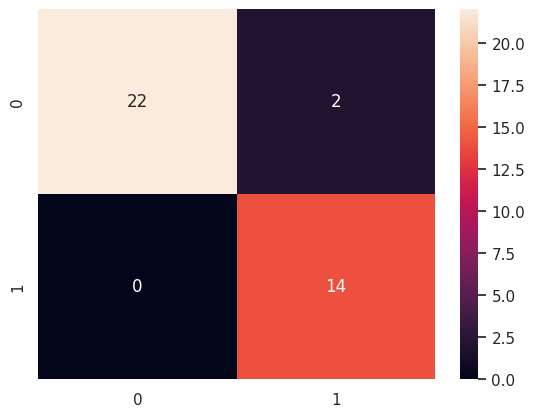

In [ ]:
from sklearn.metrics import confusion_matrix
cfm_rfc=confusion_matrix(y_pred_knn,y_test)
sns.heatmap(cfm_rfc,annot=True)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train_final,y_train)
y_pred_svc=neigh.predict(X_test_final)
print("Accuracy: %.3f" %accuracy_score(y_test, y_pred_svc))

Accuracy: 0.947


<Axes: >

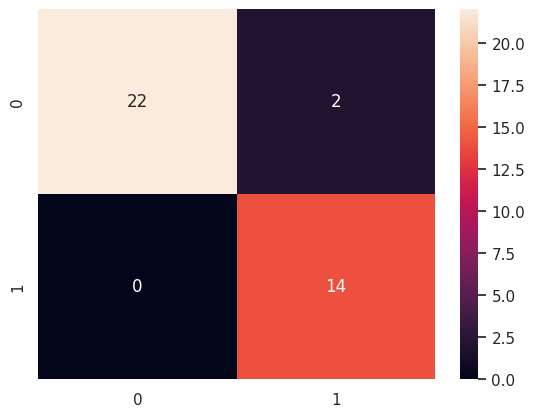

In [ ]:
from sklearn.metrics import confusion_matrix
cfm_rfc=confusion_matrix(y_pred_svc,y_test)
sns.heatmap(cfm_rfc,annot=True)

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred_nb = gnb.fit(X_train, y_train).predict(X_test)
print("Accuracy: %.3f" %accuracy_score(y_test, y_pred_nb))

Accuracy: 0.605


<Axes: >

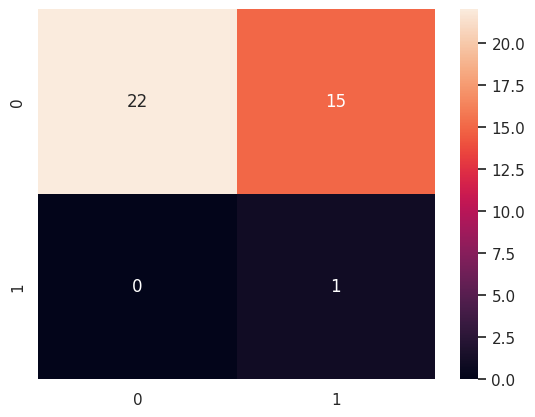

In [ ]:
from sklearn.metrics import confusion_matrix
cfm_rfc=confusion_matrix(y_pred_nb,y_test)
sns.heatmap(cfm_rfc,annot=True)